# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [58]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [59]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [60]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [61]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [62]:
# Extract all rows of data
rows = soup.find_all("tr", class_="data-row")
rows[0]

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [63]:
# Create an empty list
table_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    table_data.append(row_data)

In [64]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_df = pd.DataFrame(table_data, columns=['id', 'terrestrial_date', 'sol','ls','month','min_temp','pressure']) 

In [65]:
# Confirm DataFrame was created successfully
table_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [66]:
# Examine data type of each column
table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [71]:
# Change data types for data analysis
table_df['terrestrial_date'] = pd.to_datetime(table_df['terrestrial_date'], format='%Y-%m-%d')
table_df = table_df.astype({'sol': np.int32, 'ls': np.int32,'month': np.int32})
table_df = table_df.astype({'min_temp': np.float64, 'pressure': np.float64})

In [72]:
# Confirm type changes were successful by examining data types again
table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [73]:
# 1. How many months are there on Mars?
months_count = table_df['month'].nunique()
print(f'There are {months_count} months on Mars.')

There are 12 months on Mars.


In [74]:
# 2. How many sols (Martian days) worth of data are there?
sols_of_data = len(table_df)
print(f'There are {sols_of_data} sols worth of data.')

There are 1867 sols worth of data.


In [75]:
# 3. What is the average minimum temperature by month?
monthly_avg_temp = table_df.groupby('month')['min_temp'].mean()
monthly_avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

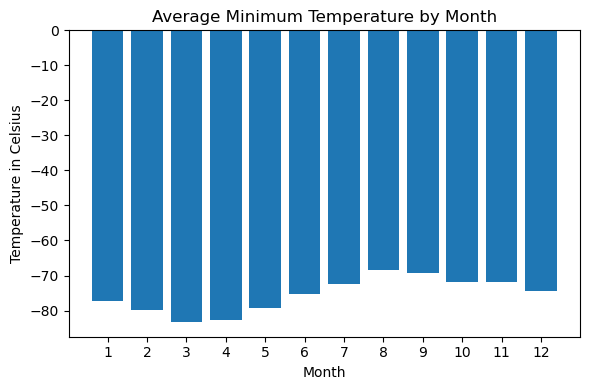

In [76]:
# Plot the average minimum temperature by month

months = list(range(1, 13))  # 1 to 12 for month

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot bars
bars = ax.bar(months, monthly_avg_temp)

# Customize the plot
ax.set_title('Average Minimum Temperature by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature in Celsius')

# Set the x-axis ticks to show all months
ax.set_xticks(months)

# Show the plot
plt.tight_layout()
plt.show()

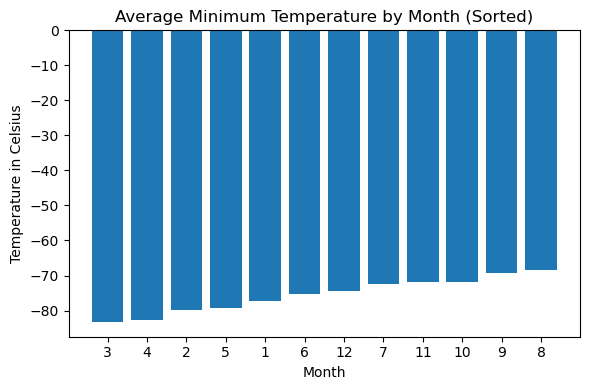

In [77]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the data
sorted_data = sorted(zip(months, monthly_avg_temp), key=lambda x: x[1])
sorted_months, sorted_temps = zip(*sorted_data)

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot bars
bars = ax.bar(range(len(sorted_months)), sorted_temps)

# Customize the plot
ax.set_title('Average Minimum Temperature by Month (Sorted)')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature in Celsius')

# Set the x-axis ticks to show all months
ax.set_xticks(range(len(sorted_months)))
ax.set_xticklabels(sorted_months)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [78]:
# 4. What is the average pressure by month?
monthly_avg_pressure = table_df.groupby('month')['pressure'].mean()
monthly_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

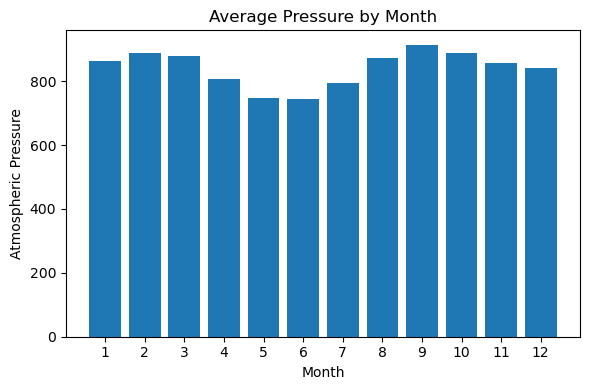

In [79]:
# Plot the average pressure by month

months = list(range(1, 13))  # 1 to 12 for month

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot bars
bars = ax.bar(months, monthly_avg_pressure)

# Customize the plot
ax.set_title('Average Pressure by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Atmospheric Pressure')

# Set the x-axis ticks to show all months
ax.set_xticks(months)

# Show the plot
plt.tight_layout()
plt.show()

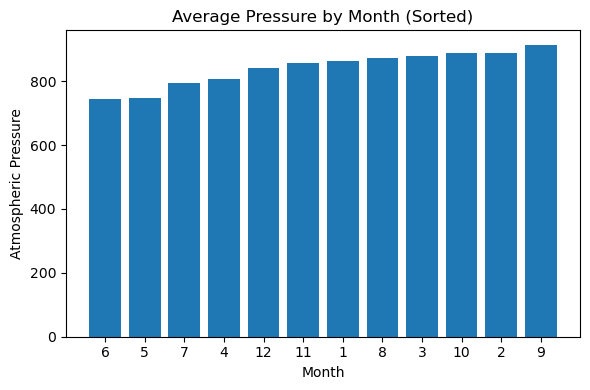

In [80]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the data
sorted_data = sorted(zip(months, monthly_avg_pressure), key=lambda x: x[1])
sorted_months, sorted_pressure = zip(*sorted_data)

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot bars
bars = ax.bar(range(len(sorted_months)), sorted_pressure)

# Customize the plot
ax.set_title('Average Pressure by Month (Sorted)')
ax.set_xlabel('Month')
ax.set_ylabel('Atmospheric Pressure')

# Set the x-axis ticks to show all months
ax.set_xticks(range(len(sorted_months)))
ax.set_xticklabels(sorted_months)

# Adjust layout and display
plt.tight_layout()
plt.show()

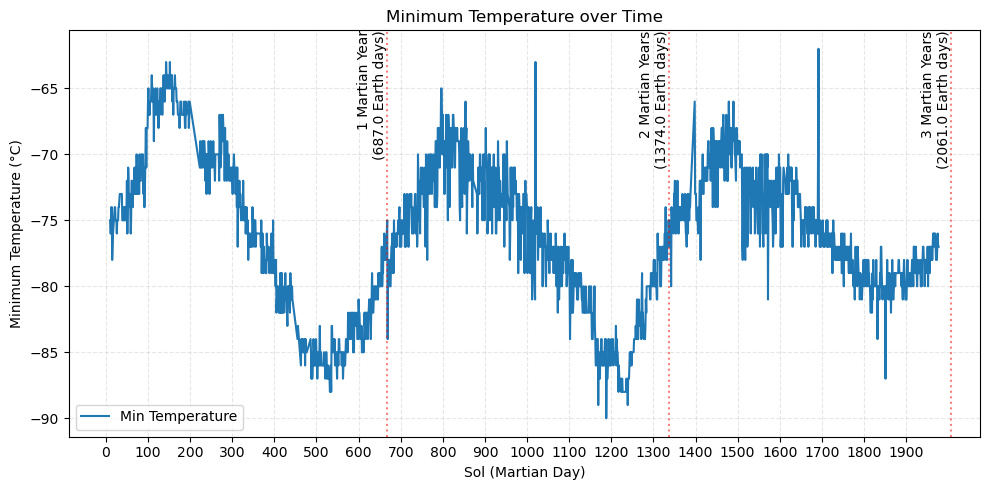

Number of sols in a Martian year: 668.61
Number of Earth days in a Martian year: 687.00


In [110]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

plt.figure(figsize=(10, 5))
plt.plot(table_df['sol'], table_df['min_temp'], label='Min Temperature')

plt.title('Minimum Temperature over Time')
plt.xlabel('Sol (Martian Day)')
plt.ylabel('Minimum Temperature (°C)')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Calculate the number of Earth days in a Martian year (approximately 687)
earth_days_in_martian_year = 687

# Calculate how many sols are in a Martian year (687 / 1.0275 ≈ 668.6)
sols_in_martian_year = earth_days_in_martian_year / 1.0275

#Place lines to mark Martian Years and total Earth days
for i in range(1, int(table_df['sol'].max() // sols_in_martian_year) + 2):
    earth_day_sol = i * sols_in_martian_year
    cumulative_earth_days = earth_days_in_martian_year * i
    plt.axvline(x=earth_day_sol, color='r', linestyle=':', alpha=0.5)
    plt.text(earth_day_sol, plt.ylim()[1], 
             f'{i} Martian Year{"s" if i>1 else ""}\n({cumulative_earth_days:.1f} Earth days)', 
             rotation=90, verticalalignment='top', horizontalalignment='right')

# Customize x-axis ticks
plt.xticks(np.arange(0, table_df['sol'].max() + 1, 100))

plt.legend()
plt.tight_layout()

plt.show()

# Print the calculation
print(f"Number of sols in a Martian year: {sols_in_martian_year:.2f}")
print(f"Number of Earth days in a Martian year: {earth_days_in_martian_year:.2f}")

#### Minimum Temperature

Month 3 has the loweest temperature on average. Month 8 has the highest minimum temperature on average. Minimum temps range from -80 to -70 indicating it is extremely cold on Mars.

#### Atmospheric Pressure
Which month, on average, has the lowest atmospheric pressure? The highest? (10 points)
Month 6 has the lowest average atmospheric pressure and month 9 has the highest average atmospheric pressure. The table does not provide the units for measuring atmospheric pressure, making addtional deductions difficult. Past research and observcations have shown Mars to have much thinner air than Earth. Also different is we can observe a change in air pressure with seasonality, which does not happen on Earth.

#### Year Length

There are about 687 Earth days in a Martian year. We can see through the changing temp observations almost three Martian years of data represented in our dataset. We observe around 668 Martian Days over a year (a full cycle of temperatures). The true conversation from Earth Days to Martian Days (Sols) is 1.02749125 Sols to every Earth day.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [113]:
# Write the data to a CSV
table_df.to_csv('mars_data.csv', index=False)

In [114]:
browser.quit()